In [1]:
from bs4 import BeautifulSoup
import re
import os
from tqdm import tqdm
from collections import Counter
import torch
import time

In [2]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dev

device(type='cuda')

In [3]:
proj_types, proj_names, proj_descrs = [],[],[]
folders = os.listdir('texts')
for folder in tqdm(folders):
    f = open(f"texts/{folder}/choose", "r", encoding="utf-8")
    contents = f.read()
    soup = BeautifulSoup(contents, 'lxml')
    founded = soup.find_all('div', {'class': 'lr-project-value'})
    proj_types.append( re.sub(r'[\n\t]', '', founded[1].get_text().lower()) )
    proj_names.append( re.sub(r'[\n\t]', '', founded[3].get_text().lower()) )
    proj_descrs.append( re.sub(r'[\n\t]', '', founded[4].get_text().lower()) )
    f.close()
    


100%|██████████| 6605/6605 [00:32<00:00, 200.86it/s]


In [4]:
len(proj_types)

6605

In [5]:
proj_types[10]

'другое'

In [6]:
proj_names[10]

'"фабрика процессов" для воспитанников детских домов и детей из многодетных семей'

In [7]:
proj_descrs[10]

'в будущем основным конкурентным преимуществом кандидата при трудоустройстве на современное производственное предприятие будут навыки бережливого отношения к ресурсам, способность постоянно находить улучшения, в том числе за счет автоматизации и цифровизации, а также способность работать в команде, находить общий язык с коллегами и совместно решать задачи, а так же серьезное отношение к безопасности. именно этим навыкам учатся ребята на "фабрике процессов". дети младших и средних классов проходят обучение в игровой форме, учащиеся старших классов и колледжей проходят фабрики, имитирующие реальное производство. на таких фабриках ребята могут составить реальное представление о работе на заводе и о выпускаемой продукции. также для ребят проводятся экскурсии по предприятиям.'

In [8]:
from collections import defaultdict

In [9]:
types_dict = defaultdict(int)
for proj_type in (proj_types):
    types_dict[proj_type] += 1
    
for key, value in sorted(types_dict.items(), key=lambda item: item[1], reverse = True):
    print("%s: %s" % (key, value))

другое: 2206
просвещение и образование — новые форматы и темы: 1851
зож: профилактика, а не лечение: 570
семья: сохранение традиций и ценностей: 533
искусственный интеллект и современные технологии на службе обществу: 523
75-я годовщина со дня победы в великой отечественной войне: 308
правовая защита граждан и предпринимателей: 216
проекты в области науки: 159
внутренний туризм: новые формы, новые маршруты: 157
культурно-историческое наследие россии: 82


In [10]:
topic = 'просвещение и образование — новые форматы и темы'

In [11]:
names, descrs = [], []
for i in range( len(proj_names) ):
    if proj_types[i] == topic:
        names.append( proj_names[i] )
        descrs.append( proj_descrs[i] )

In [12]:
len(names)

1851

In [13]:
names[21]

'реализовать проект который простым и доступным языком будет рассказывать о сложном мире финансов для несовершеннолетних подростков попавших в непростую жизненную ситуацию'

In [14]:
descrs[22]

'а ты сохранился?!большинство людей  с удивлением открывают для себя, что основная доля несчастных случаев, происходящих с детьми от 0 до 19 лет, предотвратима. в своей работе «всемирный доклад о профилактике детского травматизма» воз сообщает: «ежедневно во всем мире жизнь более 2000 семей омрачается из-за гибели ребенка по причине неумышленной травмы или так называемого «несчастного случая», которые можно было бы предотвратить. неизмеримо горе этих семей – матерей, отцов, братьев и сестер, бабушек и дедушек, – как и друзей погибших, и часто оно оказывает влияние на все сообщество. такая трагедия может бесповоротно изменить жизнь многих людей». результаты статистических исследований в рф не позволяют сформировать картину, отражающую действительность. данные о детском и подростковом травматизме, предоставляемые росстатом, отрывочны и неполны. больше всего информации имеется о несчастных случаях, произошедших с детьми в возрасте до 1-ого года, а по более взрослым детям и подросткам стат

In [15]:
# process text
for i in range( len(names) ):
    # lowcase, no , - : ; ( ) " ' « » and .
    #line = names[i].lower()
    line = names[i]
    line = re.sub(r'[\,\-\:\;\(\)\"\«\»\.\!\\\/]', ' ', line)
    line = re.sub(r"\'", ' ', line)
    # change all ... to space
    line = re.sub(r'\.+', ' ', line)
    # no doublespace
    line = re.sub(r' +', ' ', line)
    # no space after .
    #line = re.sub(r'\. ', '.', line)
    names[i] = line.strip()
    
    # lowcase, no , - : ; ( ) " ' « » keep .
    #line = descrs[i].lower()
    line = descrs[i]
    line = re.sub(r'[\,\-\:\;\(\)\"\«\»\\\/]', ' ', line)
    line = re.sub(r"\'", ' ', line)
    # change all ... to .
    line = re.sub(r'\.+', '.', line)
    # ! > .
    line = re.sub(r'\!', ".", line)
    # no doublespace
    line = re.sub(r' +', ' ', line)
    # no space after .
    line = re.sub(r'\. ', '.', line)
    # change all ... to .
    line = re.sub(r'\.+', '.', line)
    descrs[i] = line.strip()
    


In [16]:
names[0]

'на базе районного клуба культуры организовать курсы и индивидуальные занятия по использованию современных цифровых технологий для пожилых людей'

In [17]:
descrs[0]

'целью проекта является создание условий для социальной адаптации пожилых людей к использованию современных цифровых технологий улучшение качества их жизни.основные направления обучения получение государственных услуг в электронном виде социальные сети и мессенджеры для общения с близкими использование электронной почты поиск новостного и мультимедийного контента информационная безопасность правила поведения в сети интернет.обучение будет иметь в большей степени практический уклон.проект планируется осуществить на базе районных учреждений культуры.по словам сотрудников нашего районного клуба не все пожилые люди успешно воспринимают существующие курсы компьютерной грамотности им не хватает практических занятий и индивидуального подхода а также умений пользоваться другими гаджетами смартфонами планшетами современными телевизорами.часто требуется помощь по настройке устройств.руководство клуба известит пожилых людей района и соберет заявки желающих.планирую создать учебный план печатные м

### Пробуем просто все предложения данной тематике собрать в кучу

In [18]:
all_sents = []
max_slen = 0
for i in range(len(descrs)):
    sents = descrs[i].split('.')
    for j in range(len(sents)):
        sents[j] = sents[j].strip()
        slen = len(sents[j])
        if slen > 0:
            all_sents.append(sents[j])

In [19]:
len(all_sents)

31148

In [20]:
all_sents[1]

'основные направления обучения получение государственных услуг в электронном виде социальные сети и мессенджеры для общения с близкими использование электронной почты поиск новостного и мультимедийного контента информационная безопасность правила поведения в сети интернет'

In [21]:
text = ' '.join(all_sents)
text = re.sub(r'  ', ' ', text)  # убрать двойные пробелы
ALL_WORDS = set(text.strip().split(' '))
len(ALL_WORDS)

44944

In [22]:
c = Counter(text.split(' '))
c.most_common(10)

[('и', 21757),
 ('в', 18684),
 ('на', 7540),
 ('с', 6533),
 ('для', 5371),
 ('по', 4117),
 ('не', 3524),
 ('проекта', 3413),
 ('к', 3142),
 ('как', 2422)]

In [23]:
# # удаляем слова с числом повторений меньше 10
# todelete = set()
# for i, n in c.items():
#     if n < 10:
#         todelete.add(i)
        
# for i in todelete:
#     del c[i]

In [24]:
len(c.keys())

44944

In [25]:
WORDS_COUNT = 6000
ALL_WORDS = set([w for w, _ in c.most_common(WORDS_COUNT)])
INDEX_TO_WORD = ['<pad>', '<miss>'] + list(ALL_WORDS)
len(INDEX_TO_WORD)

6002

In [26]:
WORD_TO_INDEX = {w: i for i, w in enumerate(INDEX_TO_WORD)}
INDEX_TO_WORD[:10]

['<pad>',
 '<miss>',
 'определенным',
 'коммерческие',
 'письма',
 'работе',
 'ассоциация',
 'тенденция',
 'силами',
 'кем']

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([7.703e+03, 6.894e+03, 6.249e+03, 4.393e+03, 2.440e+03, 1.389e+03,
        8.020e+02, 4.390e+02, 2.600e+02, 1.740e+02, 1.090e+02, 6.600e+01,
        5.200e+01, 3.800e+01, 2.600e+01, 2.400e+01, 1.500e+01, 6.000e+00,
        5.000e+00, 1.700e+01, 9.000e+00, 6.000e+00, 6.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   6.98,  12.96,  18.94,  24.92,  30.9 ,  36.88,  42.86,
         48.84,  54.82,  60.8 ,  66.78,  72.76,  78.74,  84.72,  90.7 ,
         96.68, 102.66, 108.64, 114.62, 120.6 , 126.58, 132.56, 138.54,
        144.52, 150.5 , 156.48, 162.46, 168.44, 174.42, 180.4 , 186.38,
        192.36, 198.34, 204.32, 210.3 , 216.28, 222.26, 228.24, 234.22,
        240.2 , 

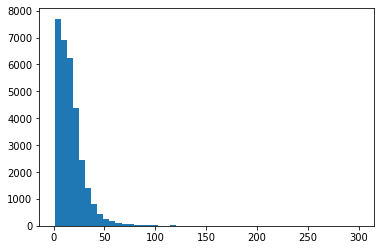

In [28]:
# распреление длины слов в предложении
plt.hist([len(s.split(' ')) for s in all_sents], bins=50)

In [29]:
MAX_LEN = 30

In [30]:
X = torch.zeros((len(all_sents), MAX_LEN), dtype=int)
# готовим матрицу - строка - предложение, столбец - индекс слова в этой позиции
for i in tqdm(range(len(all_sents))):
    for j, w in enumerate(all_sents[i].split(' ')):
        if j >= MAX_LEN:
            break
        X[i, j] = WORD_TO_INDEX.get(w, WORD_TO_INDEX['<miss>'])
        
X = X.to(dev)

100%|██████████| 31148/31148 [00:02<00:00, 13067.87it/s]


In [31]:
X[0:1]

tensor([[2211, 2826,  692, 3840, 2230, 4349, 2426, 4750, 2234, 5195,   57, 4411,
          622, 5447, 2379, 3151, 3868, 5142, 3643,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0]], device='cuda:0')

In [32]:
X.shape

torch.Size([31148, 30])

In [52]:
class Network(torch.nn.Module):

    def __init__(self, dev):
        super(Network, self).__init__()
        self.dev = dev
        self.word_embeddings = torch.nn.Embedding(len(INDEX_TO_WORD), 400).to(self.dev)
        #self.gru = torch.nn.RNN(200, 128, num_layers = 2, nonlinearity = 'relu', batch_first=True).to(self.dev)
        #self.gru = torch.nn.GRU(200, 128, num_layers = 2, batch_first=True).to(self.dev)
        self.gru = torch.nn.GRU(400, 256, num_layers = 2, batch_first=True).to(self.dev)
        self.hidden2tag = torch.nn.Linear(256, len(INDEX_TO_WORD)).to(self.dev)

    def forward(self, sentences):
        embeds = self.word_embeddings(sentences)
        gru_out, state = self.gru(embeds)
        tag_space = self.hidden2tag(gru_out.reshape(-1, 256))
        return tag_space.reshape(sentences.shape[0], sentences.shape[1], -1), state
    
    def forward_state(self, sentences, state):
        embeds = self.word_embeddings(sentences)
        gru_out, state = self.gru(embeds, state)
        tag_space = self.hidden2tag(gru_out.reshape(-1, 256))
        return tag_space.reshape(sentences.shape[0], sentences.shape[1], -1), state

In [53]:
model = Network(dev)
model.forward(X[0:1])[0].shape

torch.Size([1, 30, 6002])

In [54]:
def generate_sentence(line):
    sentence = line.split(' ')
    #sentence = ['к', 'а', 'к', ' ', 'р', 'а', 'н', 'о',' ']
    state = None
    for i in range(MAX_LEN):
        #X = torch.Tensor([[WORD_TO_INDEX[sentence[i]]]]).type(torch.long)
        X = torch.Tensor([[WORD_TO_INDEX.get(sentence[i],WORD_TO_INDEX['<miss>'])]]).type(torch.long)
        #get(w, WORD_TO_INDEX['<miss>']
        X = X.to(dev)
        if i == 0:
            result, state = model.forward(X)
        else:
            result, state = model.forward_state(X, state)
        prediction = result[0, -1, :]
        index_of_prediction = prediction.argmax()
        if i >= len(sentence) - 1:
            if index_of_prediction == 0:
                break
        sentence.append(INDEX_TO_WORD[index_of_prediction])
        
    line = ' '.join(sentence)
    line = re.sub(r'none.*$', '', line)
    print(line)

In [55]:
generate_sentence('проект направлен')

проект направлен 100 чел чел доходов формирование страна страна очных расскажут подростку воспитанникам минимальный минимальный предупреждения государства государства сентября могут считается налоговые вперед как обсуждать обсуждать индивидуальную индивидуальную опасных году занятиями занятиями


In [76]:
lrate = .1

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lrate)
#optimizer = torch.optim.Adam(model.parameters(), lr=lrate)

In [77]:
count = 0

for ep in range(3000):
    
    start = time.time()
    train_loss = 0.
    train_passed = 0
    
    for i in range(int(len(X) / 100)):
        batch = X[i * 100:(i + 1) * 100]
        X_batch = batch[:, :-1]
        Y_batch = batch[:, 1:].flatten()

        optimizer.zero_grad()
        answers, _ = model.forward(X_batch)
        answers = answers.view(-1, len(INDEX_TO_WORD))
        loss = criterion(answers, Y_batch)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        train_passed += 1
    end = time.time()
    
    count += 1
    if count == 1:
        count = 0
        trloss = train_loss / train_passed
        print("Epoch {}. Time: {:.3f}, Train loss: {:.3f}".format(ep, end - start, trloss))
        #generate_sentence('проект позволяет')

Epoch 0. Time: 2.992, Train loss: 3.349
Epoch 1. Time: 2.949, Train loss: 2.835
Epoch 2. Time: 2.956, Train loss: 2.699
Epoch 3. Time: 2.963, Train loss: 2.617
Epoch 4. Time: 2.965, Train loss: 2.564
Epoch 5. Time: 2.986, Train loss: 2.525
Epoch 6. Time: 3.007, Train loss: 2.495
Epoch 7. Time: 3.023, Train loss: 2.470
Epoch 8. Time: 3.038, Train loss: 2.449
Epoch 9. Time: 3.046, Train loss: 2.431
Epoch 10. Time: 3.059, Train loss: 2.415
Epoch 11. Time: 3.074, Train loss: 2.401
Epoch 12. Time: 3.082, Train loss: 2.388
Epoch 13. Time: 3.097, Train loss: 2.377
Epoch 14. Time: 3.094, Train loss: 2.366
Epoch 15. Time: 3.102, Train loss: 2.356
Epoch 16. Time: 3.111, Train loss: 2.346
Epoch 17. Time: 3.121, Train loss: 2.338
Epoch 18. Time: 3.127, Train loss: 2.329
Epoch 19. Time: 3.133, Train loss: 2.321
Epoch 20. Time: 3.132, Train loss: 2.314
Epoch 21. Time: 3.138, Train loss: 2.307
Epoch 22. Time: 3.142, Train loss: 2.300
Epoch 23. Time: 3.151, Train loss: 2.293
Epoch 24. Time: 3.144, Tra

KeyboardInterrupt: 

In [78]:
generate_sentence('предлагается')

предлагается создать систему подготовки <miss> и <miss> <miss> мероприятий и проведение <miss> уроков в образовательных учреждениях <miss> на <miss> <miss>


In [79]:
generate_sentence('проект позволяет')

проект позволяет <miss> <miss> на в базе том школы россии <pad> и <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [80]:
generate_sentence('в нашей стране дети')

в нашей стране дети рамках стране <miss> в которых <miss> развития возрасте они дети личности в <miss> <pad> которых <miss> и <pad> <miss> <pad> дети <pad> жизни <pad> <miss> <pad> <pad> <pad> а <pad>


In [81]:
generate_sentence('низкий уровень образования')

низкий уровень образования уровень правовой и и культуры финансовой их граждан грамотности <miss> <pad> <pad> <miss> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [82]:
generate_sentence('преподаватели будут')

преподаватели будут <miss> иметь на возможность <miss> развития со без <miss> которых <miss> <miss> в <miss> <miss> <pad> по <pad> <miss> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [58]:
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, "model.pt")

In [ ]:
# model = TheModelClass(*args, **kwargs)
# optimizer = TheOptimizerClass(*args, **kwargs)

checkpoint = torch.load("model.pt")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
loss = checkpoint['loss']

model.eval()

In [41]:
c['проект']

1626

In [44]:
c['будет']

1283

In [48]:
c.most_common(500)

[('и', 21757),
 ('в', 18684),
 ('на', 7540),
 ('с', 6533),
 ('для', 5371),
 ('по', 4117),
 ('не', 3524),
 ('проекта', 3413),
 ('к', 3142),
 ('как', 2422),
 ('что', 2298),
 ('а', 2041),
 ('детей', 1997),
 ('из', 1893),
 ('о', 1651),
 ('проект', 1626),
 ('это', 1586),
 ('их', 1507),
 ('или', 1477),
 ('от', 1449),
 ('1', 1315),
 ('–', 1285),
 ('будет', 1283),
 ('у', 1203),
 ('образования', 1184),
 ('при', 1184),
 ('2', 1170),
 ('которые', 1116),
 ('за', 1075),
 ('также', 1052),
 ('3', 1010),
 ('развития', 987),
 ('но', 983),
 ('работы', 973),
 ('так', 973),
 ('обучения', 933),
 ('реализации', 926),
 ('жизни', 909),
 ('будут', 877),
 ('россии', 787),
 ('профессии', 767),
 ('может', 764),
 ('создание', 763),
 ('области', 763),
 ('людей', 759),
 ('деятельности', 758),
 ('быть', 735),
 ('только', 709),
 ('т', 708),
 ('то', 705),
 ('рамках', 705),
 ('до', 705),
 ('можно', 704),
 ('школьников', 701),
 ('более', 693),
 ('время', 686),
 ('проведение', 679),
 ('все', 676),
 ('4', 669),
 ('они', 66